In [104]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [107]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9]=1
y[digits.target!=9]=0


In [108]:
len(y[digits.target==9])

180

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [111]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
log_reg.score(X_test, y_test)

0.9755555555555555

In [113]:
y_log_predict = log_reg.predict(X_test)

In [114]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 0) & (y_predict == 0))

TN(y_test, y_log_predict)


403

In [115]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 0) & (y_predict == 1))
FP(y_test, y_log_predict)

2

In [116]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 1) & (y_predict == 0))
FN(y_test, y_log_predict)

9

In [117]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    
    return np.sum((y_true == 1) & (y_predict == 1))
TP(y_test, y_log_predict)

36

In [124]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_test, y_log_predict), FP(y_test, y_log_predict)],
        [FN(y_test, y_log_predict), TP(y_test, y_log_predict)]
    ])
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [125]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try: 
        return tp / (tp+fp)
    except:
        return 0.0

precision_score(y_test, y_log_predict)   

0.9473684210526315

In [126]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try: 
        return tp / (tp+fn)
    except:
        return 0.0

recall_score(y_test, y_log_predict)  

0.8

# sklearn 

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [129]:
precision_score(y_test, y_log_predict)

0.9473684210526315

In [130]:
recall_score(y_test, y_log_predict)

0.8

In [131]:
def f1_score(precision, recall):
    try:
        return 2* precision * recall / (precision + recall)
    except:
        return 0.0

precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [132]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8674698795180723

In [134]:
log_reg.decision_function(X_test)[:10]

array([-22.05700185, -33.02943631, -16.21335414, -80.37912074,
       -48.25121102, -24.54004847, -44.39161228, -25.0429358 ,
        -0.97827574, -19.71740779])

In [137]:
descision_scores = log_reg.decision_function(X_test)

In [139]:
np.min(descision_scores)

-85.68612416749173

In [140]:
np.max(descision_scores)

19.889606885682948

In [142]:
y_predict_2 = np.array(descision_scores>=5 , dtype='int')

In [143]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]])

In [144]:
precision_score(y_test, y_predict_2)

0.96

In [145]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [146]:
f1_score(y_test, y_predict_2)

0.6857142857142858

In [150]:
thresholds = np.arange(np.min(descision_scores), np.max(descision_scores), 0.1)

In [153]:
precisions = []
recalls = []

for threshold in thresholds:
    y_predict = np.array(descision_scores >= threshold, dtype='int')
    
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

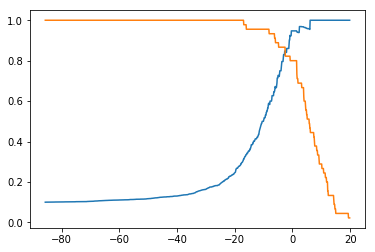

In [155]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

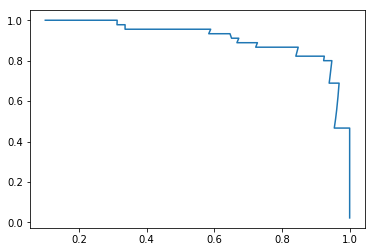

In [156]:
plt.plot( precisions, recalls)
plt.show()

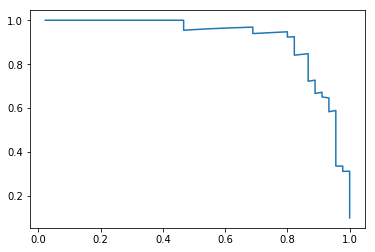

In [157]:
plt.plot(recalls, precisions)
plt.show()

In [160]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, descision_scores)

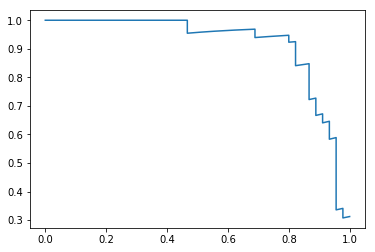

In [161]:
plt.plot(recalls, precisions)
plt.show()

In [162]:
def TPR(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try: 
        return tp / (tp+fn)
    except:
        return 0.0

TPR(y_test, y_log_predict)  

0.8

In [163]:
def FPR(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try: 
        return fp / (fp+tn)
    except:
        return 0.0

FPR(y_test, y_log_predict)  

0.0049382716049382715

array([-85.68612417, -85.58612417, -85.48612417, ...,  19.61387583,
        19.71387583,  19.81387583])

In [166]:
thresholds =  np.arange(np.min(descision_scores), np.max(descision_scores) ,  0.1)
fprs = []
tprs = []

for threshold in thresholds:
    y_predict = np.array(descision_scores >= threshold, dtype='int')
    
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

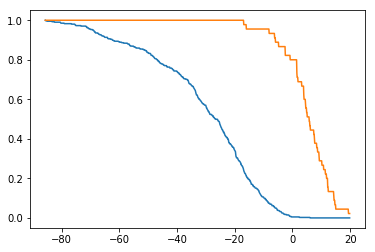

In [167]:
plt.plot(thresholds, fprs)
plt.plot(thresholds, tprs)
plt.show()

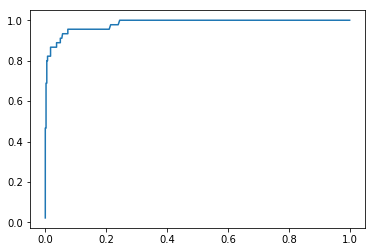

In [168]:
plt.plot(fprs, tprs)
plt.show()

In [170]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds =  roc_curve(y_test, descision_scores)

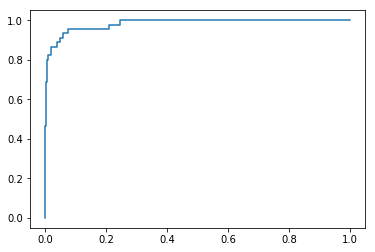

In [171]:
plt.plot(fprs, tprs)

In [172]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, descision_scores)

0.9830452674897119